# Predicting TShirt Size

In [ ]:
options(repr.plot.width=4, repr.plot.height=4)
knitr::opts_chunk$set(fig.width=4, fig.height=4)
options("scipen"=100, "digits"=4)
if(!require("readr")) install.packages("readr")
if(!require("knitr")) install.packages("knitr")
if(!require("Metrics")) install.packages("Metrics")
if(!require("class")) install.packages("class")
library("readr")
library("Metrics")
library("class")
library("knitr")
normalize <- function(x) {
    return ( (x-min(x))/(max(x)-min(x)) )
}

## Predicting TShirt Size using KNN

First lets take a look at the data we will work with.

So here is the data we have, this will be our training data:

-   `Size` is our result or outcome
-   `Height`, `Weight` are the predictors

We hope that we can predict the T Shirt size from the Height and Weight:

| Height | Weight | Size |
|--------|--------|------|
| 158    | 59     | M    |
| 160    | 59     | M    |
| 160    | 60     | M    |
| 163    | 61     | M    |
| 160    | 64     | L    |
| 165    | 61     | L    |
| 165    | 62     | L    |
| 168    | 62     | L    |
| 168    | 63     | L    |
| 170    | 63     | L    |
| 170    | 68     | L    |

In [ ]:
trainurl<-"https://docs.google.com/spreadsheets/d/e/2PACX-1vQb1-HxaC0FoyX5qGgAqcYRIVS5eZqwwfnECQucfqZ-Kn-65Pdacy80UX4K2AAJQH0WwgPd_OH_6Y7d/pub?gid=0&single=true&output=csv"
traindf<-read.csv(trainurl, stringsAsFactors=TRUE)
str(traindf)

'data.frame':   11 obs. of  3 variables:
 $ Height: int  158 160 160 163 160 165 165 168 168 170 ...
 $ Weight: int  59 59 60 61 64 61 62 62 63 63 ...
 $ Size  : Factor w/ 2 levels "L","M": 2 2 2 2 1 1 1 1 1 1 ...

Now let’s print out the training set to make sure we read it correctly:

In [ ]:
print(traindf)

   Height Weight Size
1     158     59    M
2     160     59    M
3     160     60    M
4     163     61    M
5     160     64    L
6     165     61    L
7     165     62    L
8     168     62    L
9     168     63    L
10    170     63    L
11    170     68    L

Lets take a look at the data as well:

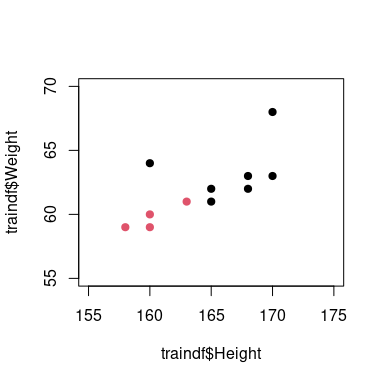

In [ ]:
plot(traindf$Height, traindf$Weight, col=traindf$Size, pch=19, xlim=c(155,175), ylim=c(55,70))

We also need a testing data set so here it is:

| Height | Weight | Size |
|--------|--------|------|
| 158    | 58     | M    |
| 158    | 63     | M    |
| 163    | 60     | M    |
| 163    | 64     | L    |
| 165    | 65     | L    |
| 168    | 66     | L    |
| 170    | 64     | L    |

In [ ]:
testurl<-"https://docs.google.com/spreadsheets/d/e/2PACX-1vQb1-HxaC0FoyX5qGgAqcYRIVS5eZqwwfnECQucfqZ-Kn-65Pdacy80UX4K2AAJQH0WwgPd_OH_6Y7d/pub?gid=15577345&single=true&output=csv"
testdf<-read.csv(testurl, stringsAsFactors=TRUE)
str(testdf)

'data.frame':   7 obs. of  3 variables:
 $ Height: int  158 158 163 163 165 168 170
 $ Weight: int  58 63 60 64 65 66 64
 $ Size  : Factor w/ 2 levels "L","M": 2 2 2 1 1 1 1

In [ ]:
print(testdf)

  Height Weight Size
1    158     58    M
2    158     63    M
3    163     60    M
4    163     64    L
5    165     65    L
6    168     66    L
7    170     64    L

Now lets extract the last column of the train dataset since we need it
as the ‘cl’ argument in the knn function. We also remove the `Shirt`
column from the data frames since knn expects the dataframes to have no
result columns

In [ ]:
train_target <- traindf$Size
traindf$Size <- NULL

test_target <- testdf$Size 
testdf$Size <- NULL

traindf_n <- as.data.frame(lapply(traindf, normalize))
testdf_n <- as.data.frame(lapply(testdf, normalize))

set.seed(1234)
prediction<-knn(traindf_n,testdf_n, cl=train_target, k=3)
print(prediction)

[1] M M L L L L L
Levels: L M

We put the actuals and predictions back into the test data frame so we
can check accuracy:

In [ ]:
testdf$Size <- test_target
testdf$Prediction <- prediction
print(testdf)

  Height Weight Size Prediction
1    158     58    M          M
2    158     63    M          M
3    163     60    M          L
4    163     64    L          L
5    165     65    L          L
6    168     66    L          L
7    170     64    L          L

Here is the confusion matrix and the accuracy:

In [ ]:
table(prediction=prediction,actual=test_target)

          actual
prediction L M
         L 4 1
         M 0 2

[1] 0.8571

First we normalize the predictors for those test values:

In [ ]:
normHeight<-normalize(testdf_n$Height)
normWeight<-normalize(testdf_n$Weight)

Now lets examine the 1st data value in the test set:

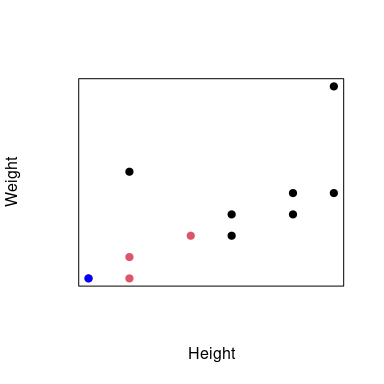

  Height Weight Size Prediction
1    158     58    M          M

In [ ]:
plot(traindf_n$Height, traindf_n$Weight, col=train_target, pch=19, xlab="Height", ylab="Weight", xaxt='n', yaxt='n') 
points(normHeight[1], normWeight[1], pch=19, col="blue")

Here is the 2nd data value in the testing set:

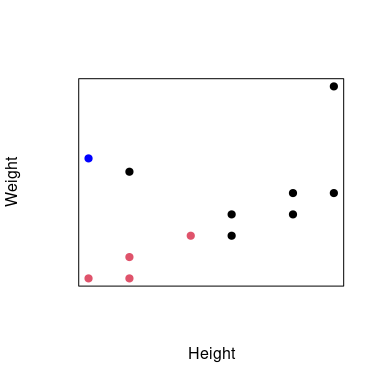

  Height Weight Size Prediction
2    158     63    M          M

In [ ]:
plot(traindf_n$Height, traindf_n$Weight, col=train_target, pch=19, xlab="Height", ylab="Weight", xaxt='n', yaxt='n') 
points(normHeight[2], normWeight[2], pch=19, col="blue")

Here is the 3rd data value in the testing set:

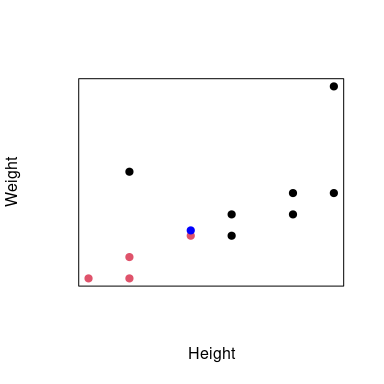

  Height Weight Size Prediction
3    163     60    M          L

In [ ]:
plot(traindf_n$Height, traindf_n$Weight, col=train_target, pch=19, xlab="Height", ylab="Weight", xaxt='n', yaxt='n') 
points(normHeight[3], normWeight[3], pch=19, col="blue")

Here is the 4rd data value in the testing set:

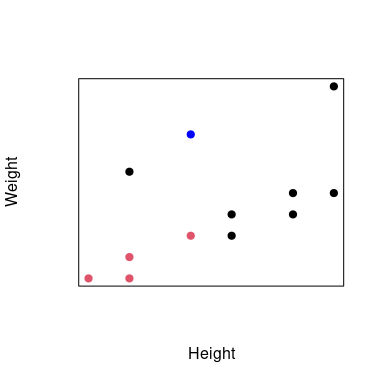

  Height Weight Size Prediction
4    163     64    L          L

In [ ]:
plot(traindf_n$Height, traindf_n$Weight, col=train_target, pch=19, xlab="Height", ylab="Weight", xaxt='n', yaxt='n') 
points(normHeight[4], normWeight[4], pch=19, col="blue")

Here is the 5rd data value in the testing set:

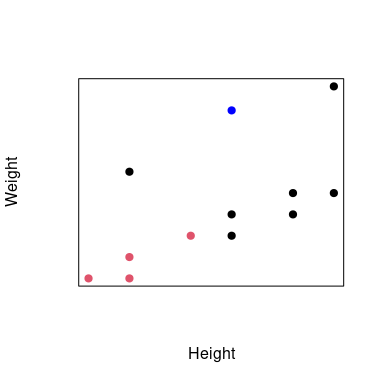

  Height Weight Size Prediction
5    165     65    L          L

In [ ]:
plot(traindf_n$Height, traindf_n$Weight, col=train_target, pch=19, xlab="Height", ylab="Weight", xaxt='n', yaxt='n') 
points(normHeight[5], normWeight[5], pch=19, col="blue")